In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def cargar_dataset(archivo):
    "Carga archivos en formato CSV."
    if not archivo.endswith('.csv'):
        raise ValueError("Solo se admiten archivos CSV.")
    return pd.read_csv(archivo)

In [33]:
# Carga desde un archivo .csv sin índice
data = pd.read_csv('Sicily.csv')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57963 entries, 0 to 57962
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   57963 non-null  int64  
 1   name                                         57963 non-null  object 
 2   description                                  56172 non-null  object 
 3   neighborhood_overview                        26238 non-null  object 
 4   host_name                                    57960 non-null  object 
 5   host_since                                   57960 non-null  object 
 6   host_location                                38840 non-null  object 
 7   host_about                                   22103 non-null  object 
 8   host_response_time                           36004 non-null  object 
 9   host_response_rate                           36004 non-null  object 
 10

In [35]:
# Corroboramos valores nulos del dataframe
valores_nulos = data.isnull().sum()
valores_nulos

Unnamed: 0                                         0
name                                               0
description                                     1791
neighborhood_overview                          31725
host_name                                          3
host_since                                         3
host_location                                  19123
host_about                                     35860
host_response_time                             21959
host_response_rate                             21959
host_acceptance_rate                           10493
host_is_superhost                               1062
host_listings_count                                3
host_total_listings_count                          3
host_has_profile_pic                               3
host_identity_verified                             3
neighbourhood                                  31724
latitude                                           0
longitude                                     

In [36]:
def eliminar_outliers_std(data):
    """Elimina outliers utilizando la desviación estándar."""
    df_numerico = data.select_dtypes(include=['float64', 'int64', 'int'])
    df_filtrado = data[(df_numerico - df_numerico.mean()).abs() <= (3 * df_numerico.std())]
    return df_filtrado

In [37]:
def eliminar_outliers_iqr(data):
    """Elimina outliers utilizando el rango intercuartílico (IQR)."""
    df_numerico = data.select_dtypes(include=['float64', 'int64', 'int'])
    Q1 = df_numerico.quantile(0.25)
    Q3 = df_numerico.quantile(0.75)
    IQR = Q3 - Q1
    df_filtrado = data[~((df_numerico < (Q1 - 1.5 * IQR)) | (df_numerico > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_filtrado

In [38]:
def generar_boxplots(data, titulo):
    """Genera diagramas de caja para cada columna numérica en el dataframe."""
    df_numerico = data.select_dtypes(include=['float64', 'int64', 'int'])
    fig = plt.figure(figsize=(15, 8))
    df_numerico.plot(kind='box', vert=False)
    plt.title(titulo)
    plt.show()

In [39]:
# Carga desde un archivo .csv sin índice
data2 = pd.read_csv('Mexico.csv')

In [40]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26281 non-null  int64  
 1   name                            26281 non-null  object 
 2   host_id                         26281 non-null  int64  
 3   host_name                       26278 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26281 non-null  object 
 6   latitude                        26281 non-null  float64
 7   longitude                       26281 non-null  float64
 8   room_type                       26281 non-null  object 
 9   price                           22466 non-null  float64
 10  minimum_nights                  26281 non-null  int64  
 11  number_of_reviews               26281 non-null  int64  
 12  last_review                     

In [41]:
# Corroboramos valores nulos del dataframe
valores_nulos = data2.isnull().sum()
valores_nulos

id                                    0
name                                  0
host_id                               0
host_name                             3
neighbourhood_group               26281
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              3815
minimum_nights                        0
number_of_reviews                     0
last_review                        3296
reviews_per_month                  3296
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           26281
dtype: int64

In [42]:
def eliminar_outliers_std(data2):
    """Elimina outliers utilizando la desviación estándar."""
    df_numerico = data2.select_dtypes(include=['float64', 'int64', 'int'])
    df_filtrado = data2[(df_numerico - df_numerico.mean()).abs() <= (3 * df_numerico.std())]
    return df_filtrado

In [43]:
def eliminar_outliers_iqr(data):
    """Elimina outliers utilizando el rango intercuartílico (IQR)."""
    df_numerico = data2.select_dtypes(include=['float64', 'int64', 'int'])
    Q1 = df_numerico.quantile(0.25)
    Q3 = df_numerico.quantile(0.75)
    IQR = Q3 - Q1
    df_filtrado = data2[~((df_numerico < (Q1 - 1.5 * IQR)) | (df_numerico > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_filtrado

In [44]:
def generar_boxplots(data2, titulo):
    """Genera diagramas de caja para cada columna numérica en el dataframe."""
    df_numerico = data2.select_dtypes(include=['float64', 'int64', 'int'])
    fig = plt.figure(figsize=(15, 8))
    df_numerico.plot(kind='box', vert=False)
    plt.title(titulo)
    plt.show()

<Figure size 1500x800 with 0 Axes>

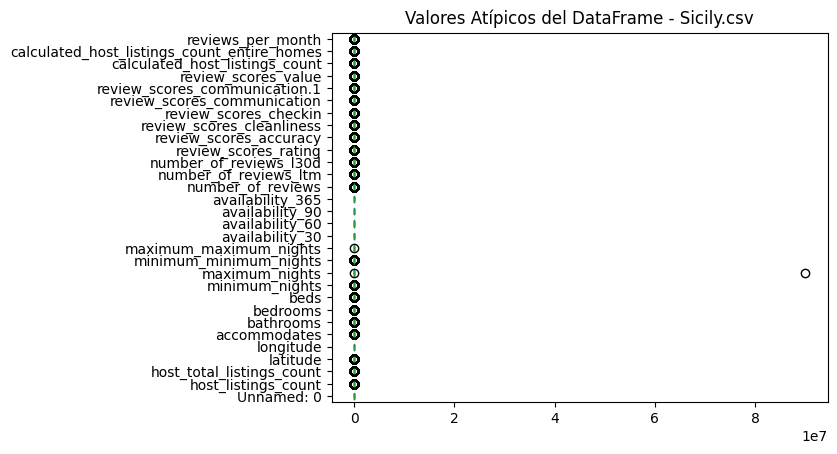

<Figure size 1500x800 with 0 Axes>

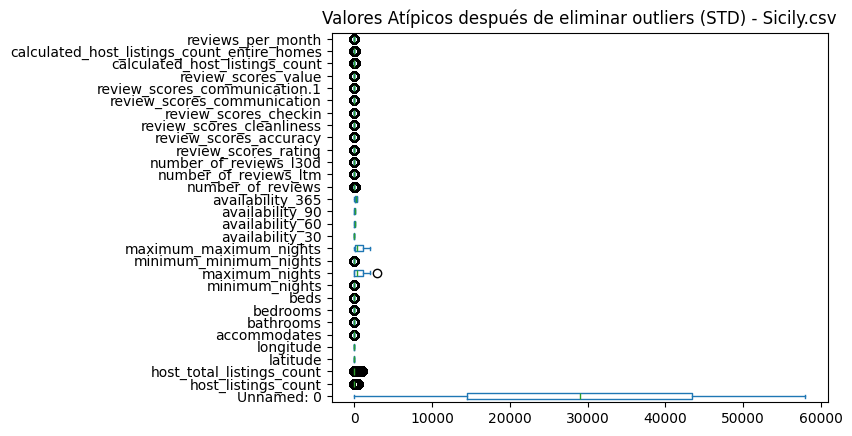

<Figure size 1500x800 with 0 Axes>

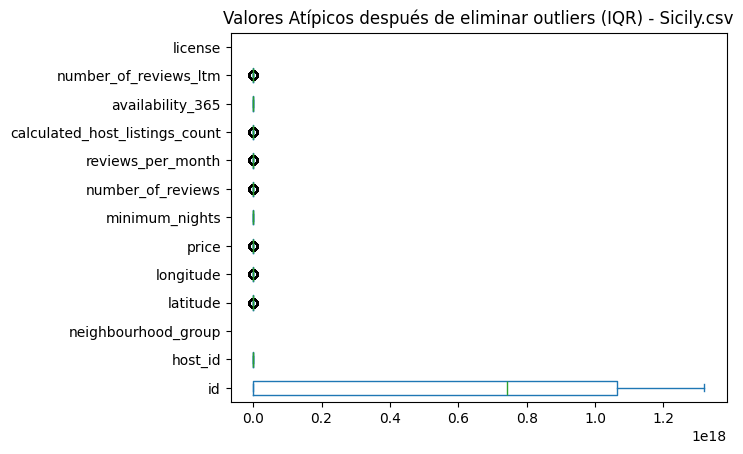

<Figure size 1500x800 with 0 Axes>

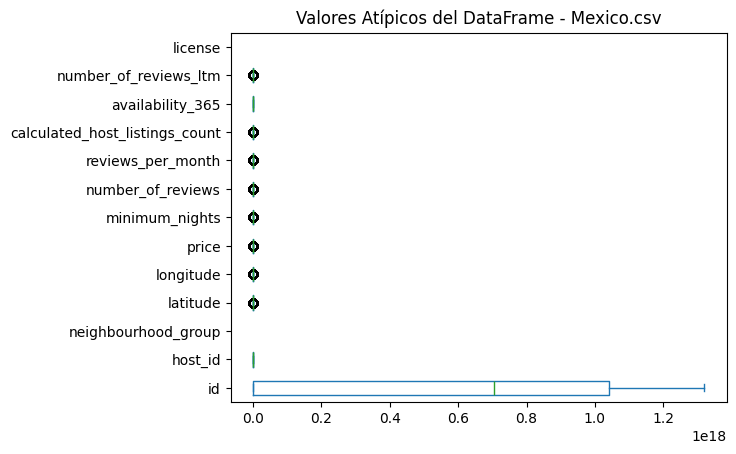

<Figure size 1500x800 with 0 Axes>

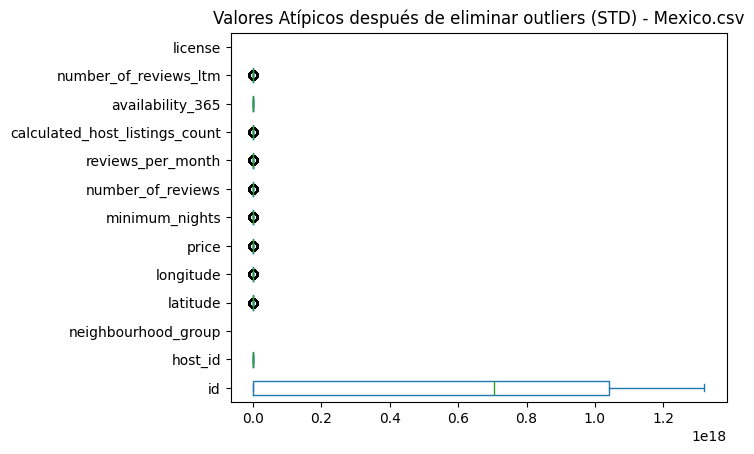

<Figure size 1500x800 with 0 Axes>

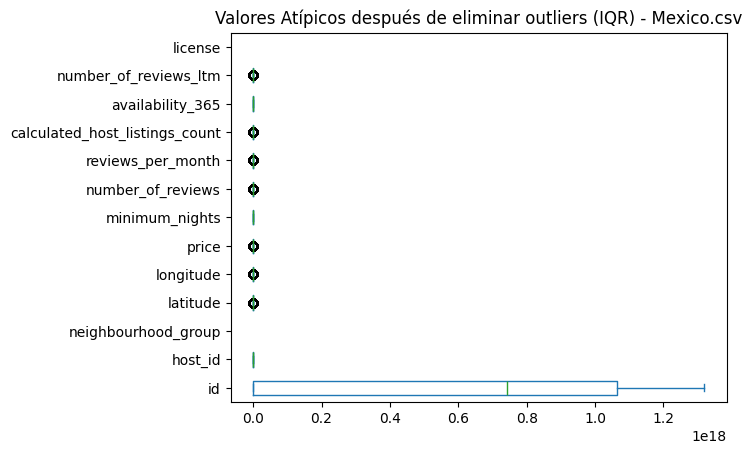

Procesamiento completado y archivos guardados.


In [47]:
# Procesar archivos Pais.csv y Mexico.csv
for file_path in ["Sicily.csv", "Mexico.csv"]:
    df = cargar_dataset(file_path)
    df_std = eliminar_outliers_std(df)
    df_iqr = eliminar_outliers_iqr(df)
    
    generar_boxplots(df, f"Valores Atípicos del DataFrame - {file_path}")
    generar_boxplots(df_std, f"Valores Atípicos después de eliminar outliers (STD) - {file_path}")
    generar_boxplots(df_iqr, f"Valores Atípicos después de eliminar outliers (IQR) - {file_path}")
    
    df_std.to_csv(f"{file_path.replace('.csv', '')}_sin_outliers_std.csv", index=False)
    df_iqr.to_csv(f"{file_path.replace('.csv', '')}_sin_outliers_iqr.csv", index=False)

print("Procesamiento completado y archivos guardados.")